### Task 1: YouTube Streamer Analysis

* Dataset: Top 1000 Youtubers statistics

* Description: This dataset contains valuable
information about the top YouTube streamers,
including their ranking, categories, subscribers,
country, visits, likes, comments, and more. I endeavor to perform a comprehensive
analysis of the dataset to extract insights
about the top YouTube content creators.

### Importation of Libraries

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [2]:
# Load dataset

data = pd.read_csv('./dataset/youtubers_df.csv')

### Data Exploration

In [3]:
# Information summary on dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [4]:
# Check shape of dataset
print(f'Shape of dataset:{data.shape}')

Shape of dataset:(1000, 9)


In [5]:
# statistical description of numerical features in the dataset

data.describe().T


,count,mean,std,min,25%,50%,75%,max
Rank,1000.0,5.005000e+02,2.888194e+02,1.0,250.75,500.5,750.25,1000.0
Suscribers,1000.0,2.189440e+07,1.682775e+07,11700000.0,13800000.00,16750000.0,23700000.00,249500000.0
Visits,1000.0,1.209446e+06,5.229942e+06,0.0,31975.00,174450.0,865475.00,117400000.0
Likes,1000.0,5.363259e+04,2.580457e+05,0.0,471.75,3500.0,28650.00,5300000.0
Comments,1000.0,1.288768e+03,6.778188e+03,0.0,2.00,67.0,472.00,154000.0


In [6]:
# Snippet Summary of categorical features in dataset

data.describe(include = 'object').T

,count,unique,top,freq
Username,1000,994,NickyJamTV,2
Categories,694,45,Música y baile,160
Country,1000,29,Estados Unidos,293
Links,1000,994,http://youtube.com/channel/UCpb_iJuhFe8V6rQdbN...,2


In [7]:
# Preview of dataset in tabular form
# Top five rows
print('HEAD:')
data.head(5)

HEAD:


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [8]:
# Preview of dataset in tabular form
# Bottom five rows
print('TAIL:')
data.tail(5)

TAIL:


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...
999,1000,OneindiaHindi,Noticias y Política,11700000.0,India,2200.0,31.0,1.0,http://youtube.com/channel/UCOjgc1p2hJ4GZi6pQQ...


In [9]:
# Check for missing values in the dataset
# There are some missing values in the 'Categories' column

print(f'Count of missing values in the features:-\n\n{data.isna().sum()}')

Count of missing values in the features:-

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64


In [10]:
# Check for Duplicates across all the columns of dataset

print(f'Count of duplicates across all columns of the dataset: {data.duplicated().sum()}\n')

# Check of duplicates across specific columns using 'subset' parameter

columns_to_check = ['Username','Categories', 'Links', 'Country']

print(f"Duplicates based on 'Username','Categories', 'Links', and 'Country' columns:")
data[data.duplicated(subset= columns_to_check, keep=False)]

Count of duplicates across all columns of the dataset: 0

Duplicates based on 'Username','Categories', 'Links', and 'Country' columns:


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
249,250,NickyJamTV,"Música y baile, Películas",23700000.0,Colombia,15800.0,1200.0,58.0,http://youtube.com/channel/UCpb_iJuhFe8V6rQdbN...
250,251,NickyJamTV,"Música y baile, Películas",23700000.0,Colombia,15800.0,1200.0,58.0,http://youtube.com/channel/UCpb_iJuhFe8V6rQdbN...
447,448,mgcplayhouse,"Juguetes, Coches y vehículos",17800000.0,Unknown,56300.0,96.0,0.0,http://youtube.com/channel/UC6zPzUJo8hu-5TzUk8...
449,450,thexoteam,NaN,17800000.0,Estados Unidos,797600.0,50400.0,179.0,http://youtube.com/channel/UClZAOlfhJQJRym39Wo...
450,451,thexoteam,NaN,17900000.0,Estados Unidos,772800.0,45000.0,185.0,http://youtube.com/channel/UClZAOlfhJQJRym39Wo...
451,452,mgcplayhouse,"Juguetes, Coches y vehículos",17800000.0,Unknown,63600.0,75.0,0.0,http://youtube.com/channel/UC6zPzUJo8hu-5TzUk8...
946,947,Super_Senya_RU,"Animación, Juguetes",12100000.0,Unknown,47200.0,192.0,0.0,http://youtube.com/channel/UCTn9Vyy-3fzLIr0bqh...
947,948,HiTechIslamic,Música y baile,12100000.0,Pakistán,62200.0,810.0,59.0,http://youtube.com/channel/UCtKKyuORzErSd7TWfk...
949,950,Family-Box,Películas,12000000.0,Rusia,173600.0,6600.0,105.0,http://youtube.com/channel/UC-jHNWViReG6R_kJ6b...
952,953,Super_Senya_RU,"Animación, Juguetes",12100000.0,Unknown,47200.0,192.0,0.0,http://youtube.com/channel/UCTn9Vyy-3fzLIr0bqh...


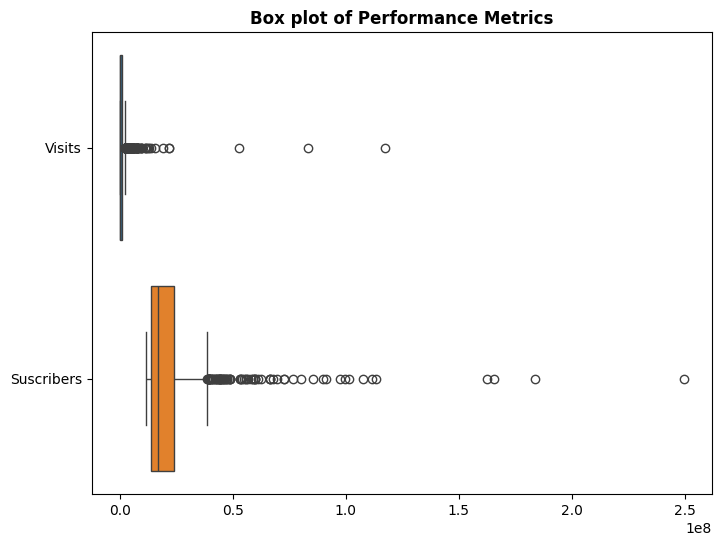

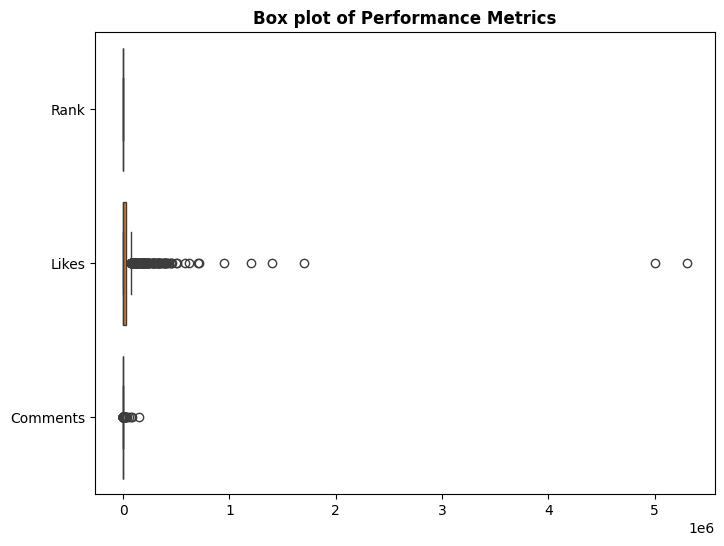

In [11]:
# Check for outliers using boxplot

plt.figure(figsize=(8, 6))
#sns.boxplot(data=data, orient='h')
sns.boxplot(data=data[['Visits', 'Suscribers']], orient='h')
plt.title('Box plot of Performance Metrics', fontweight='bold')
plt.show();

plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['Rank', 'Likes', 'Comments']], orient='h')
plt.title('Box plot of Performance Metrics', fontweight='bold')
plt.show();

* Dataset features contain outliers except 'Rank'. This is because 'Rank' has a consecutive order.

#### Trend Analysis

                  Categories    Suscribers
0             Música y baile  4.293900e+09
1       Películas, Animación  1.384300e+09
2        Animación, Juguetes  8.519000e+08
3  Música y baile, Películas  7.985000e+08
4        Noticias y Política  6.761000e+08
5     Animación, Videojuegos  6.594000e+08
6              Vlogs diarios  6.549000e+08
7           Películas, Humor  6.221000e+08
8                  Educación  6.003000e+08
9           Animación, Humor  5.612000e+08


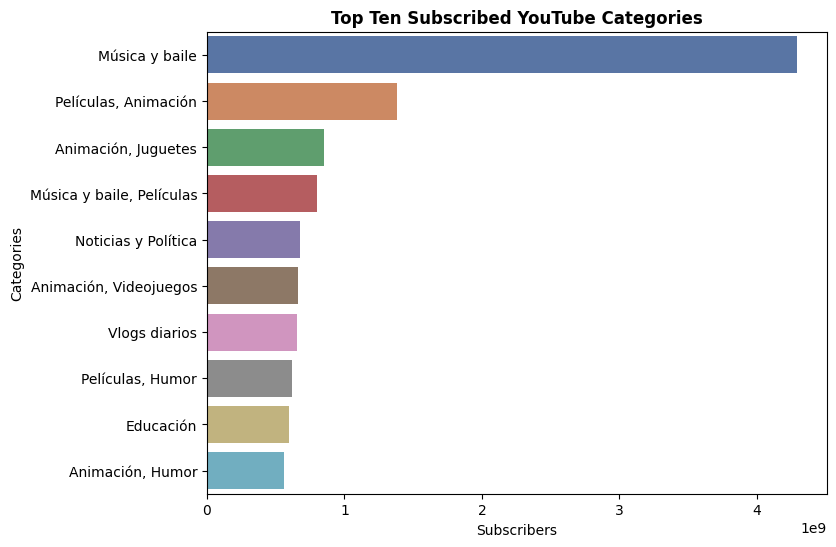

In [12]:
# set a color palette
custom_palette = sns.color_palette("deep")

# Group by Categories and sum the Subscribers

category_groups = data.groupby('Categories')['Suscribers'].sum().reset_index()
category_groups 
# Sort the categories by the sum of subscribers in descending order
category_groups_sorted = category_groups.sort_values(by='Suscribers', ascending=False)

#Select the top ten categories
top_ten_categories = category_groups_sorted.reset_index(drop=True).head(10)

print(top_ten_categories)

# Visualize top ten subscribed categories using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=top_ten_categories, x='Suscribers', y='Categories', orient='h', palette=custom_palette)
plt.title('Top Ten Subscribed YouTube Categories', fontweight='bold')
plt.xlabel('Subscribers')
plt.ylabel('Categories')
plt.show();

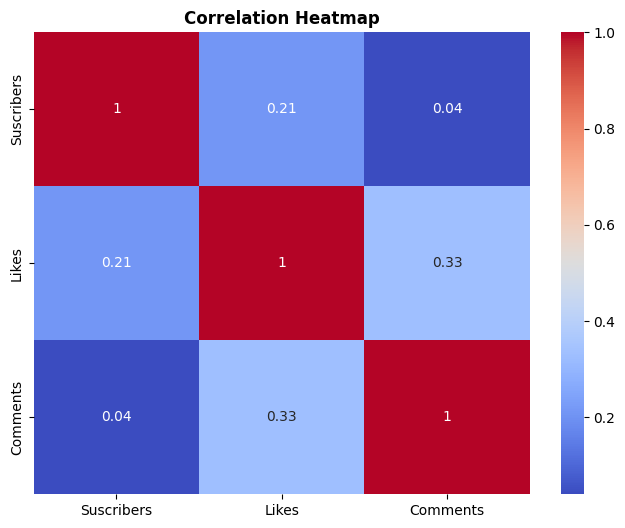

In [13]:
# Correlation between the number of subscribers and the number of likes or comments

correlation_columns = ['Suscribers', 'Likes', 'Comments']

correlation_data = data[correlation_columns].corr().round(2)

# Visuallize correlation of features using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data = correlation_data, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap', fontweight='bold')
plt.show();

* There is some low correlation between the number of youtube subscribers and likes (0.21), as well as low correlation between number of youtube likes and comments (0.33).

* There is no significant correlation between youtube subscribers and comments(0.04)

#### Audience Study

          Country    Suscribers
0  Estados Unidos  6.266600e+09
1           India  5.823700e+09
2         Unknown  4.129900e+09
3          Brasil  1.246900e+09
4          México  1.151900e+09
5       Indonesia  7.525000e+08
6           Rusia  4.264000e+08
7       Tailandia  3.602000e+08
8        Colombia  3.354000e+08
9       Filipinas  2.610000e+08


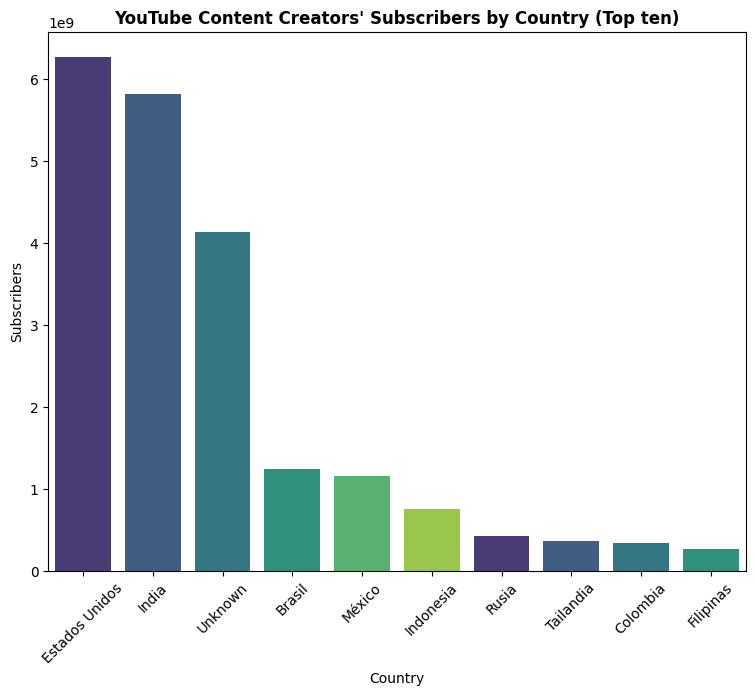

In [14]:
# distribution of streamers' audiences by country. 

audience_per_country = data.groupby('Country')['Suscribers'].sum().reset_index()

# set a color palette
custom_palette = sns.color_palette("viridis")

# Sort the countries by the sum of subscribers in descending order
audience_per_country_sorted = audience_per_country.sort_values(by='Suscribers', ascending=False)

# Visualize top ten subscribed countries
top_ten_audience_per_country = audience_per_country_sorted.reset_index(drop=True).head(10)

print(top_ten_audience_per_country)

#visualize top ten subscribed countries using bar plot
plt.figure(figsize=(9,7))
sns.barplot(data=top_ten_audience_per_country, x='Country', y='Suscribers', palette=custom_palette)
plt.title('YouTube Content Creators\' Subscribers by Country (Top ten)', fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Subscribers')
plt.xticks(rotation=45)
plt.show();

In [15]:
# Are there regional preferences for specific content categories?

categories_by_country = data.groupby('Country')['Categories'].value_counts().reset_index()

sorted_categories_by_country = categories_by_country.sort_values(by='count', ascending=False)

top_preffered_categories_by_country = sorted_categories_by_country.head(20)

top_preffered_categories_by_country

,Country,Categories,count
32,Estados Unidos,Música y baile,53
75,India,Música y baile,42
151,Unknown,"Animación, Juguetes",28
76,India,Noticias y Política,19
33,Estados Unidos,"Animación, Videojuegos",19
152,Unknown,Música y baile,18
10,Brasil,Música y baile,17
34,Estados Unidos,"Animación, Humor",17
35,Estados Unidos,"Videojuegos, Humor",14
77,India,Vlogs diarios,13


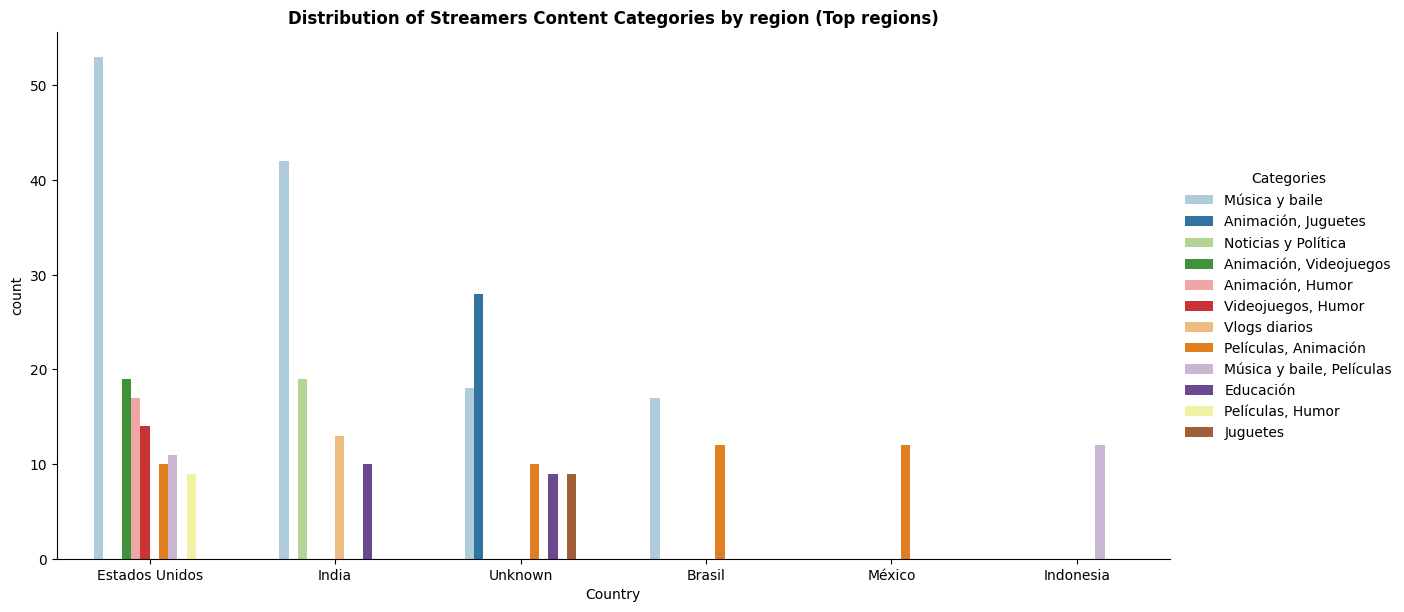

In [16]:
# set custom pallete
custom_palette = sns.set_palette('Paired')

# Plot a catplot to visualize count of categorical features

sns.catplot(x='Country', y='count', hue='Categories', kind='bar', data=top_preffered_categories_by_country,
             height=6, aspect=2, palette=custom_palette, dodge=0.2, width=0.6)

plt.title('Distribution of Streamers Content Categories by region (Top regions)', fontweight='bold')

# show the plot
plt.show();

#### Performance Metrics

Average number of YouTube content creators 'Subscribers', 'Visits', 'Likes', and 'Comments': 
Suscribers    2.189440e+07
Visits        1.209446e+06
Likes         5.363259e+04
Comments      1.288768e+03
dtype: float64


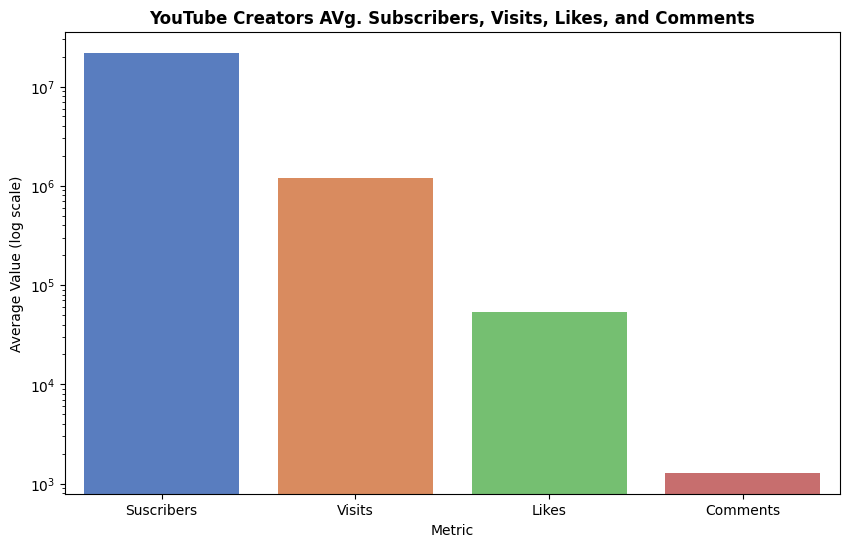

In [17]:
# Calculate and visualize the average number of subscribers, visits, likes, and comments.
# Are there patterns or anomalies in these metrics?

#set color palette
custom_palette = sns.color_palette('muted')

# Calculate the average for each metric
average_metrics = data[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()

print(f"Average number of YouTube content creators 'Subscribers', 'Visits', 'Likes', and 'Comments': \n{average_metrics}")

# Visualize the averages using a bar plot with a logarithmic scale
plt.figure(figsize=(10, 6))

sns.barplot(x=average_metrics.index, y=average_metrics.values, palette=custom_palette)
plt.yscale('log')  # Use of a logarithmic scale for the y-axis makes it easier to visualize metrics with smaller averages.
plt.title('YouTube Creators AVg. Subscribers, Visits, Likes, and Comments', fontweight='bold')
plt.xlabel('Metric')
plt.ylabel('Average Value (log scale)')
plt.show()

Content Categories

                     Category  Count
0              Música y baile    160
1        Películas, Animación     61
2   Música y baile, Películas     41
3               Vlogs diarios     37
4         Noticias y Política     36
5            Películas, Humor     34
6      Animación, Videojuegos     34
7         Animación, Juguetes     29
8            Animación, Humor     27
9                   Películas     24
10                  Educación     24
11                  Animación     22
12                Videojuegos     19
13         Videojuegos, Humor     17
14  Música y baile, Animación     16
15       Ciencia y tecnología     14
16            Comida y bebida     12
17                      Humor     10
18                   Juguetes     10
19        Películas, Juguetes      9


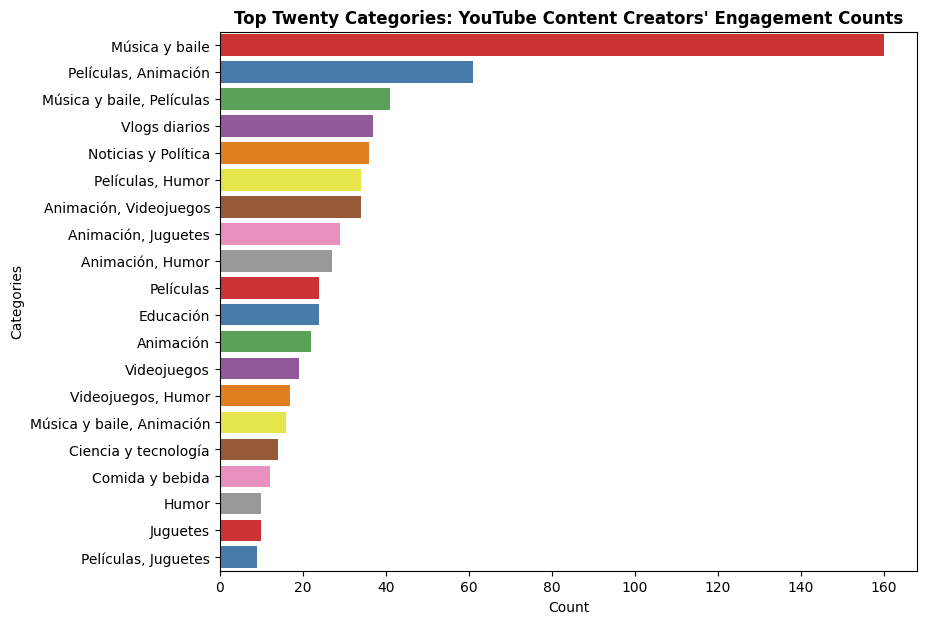

In [18]:
#Explore the distribution of content categories. Which categories have the highest number of streamers?
#Are there specific categories with exceptional performance metrics?

content_categories = data['Categories'].value_counts().reset_index()

# Define dataset columns
content_categories.columns = ['Category', 'Count']

# Define custom color palette
custom_palette = sns.color_palette('Set1')

# Filter out top ten categories preffered by YouTube streamers
top_content_categories = content_categories.head(20)

print(top_content_categories)

plt.figure(figsize=(9, 7))
sns.barplot(data=top_content_categories, x='Count', y='Category', palette=custom_palette, orient='h')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Top Twenty Categories: YouTube Content Creators\' Engagement Counts',fontweight='bold')
# Show the plot
plt.show()

#### Top content creators by different engagement metrics

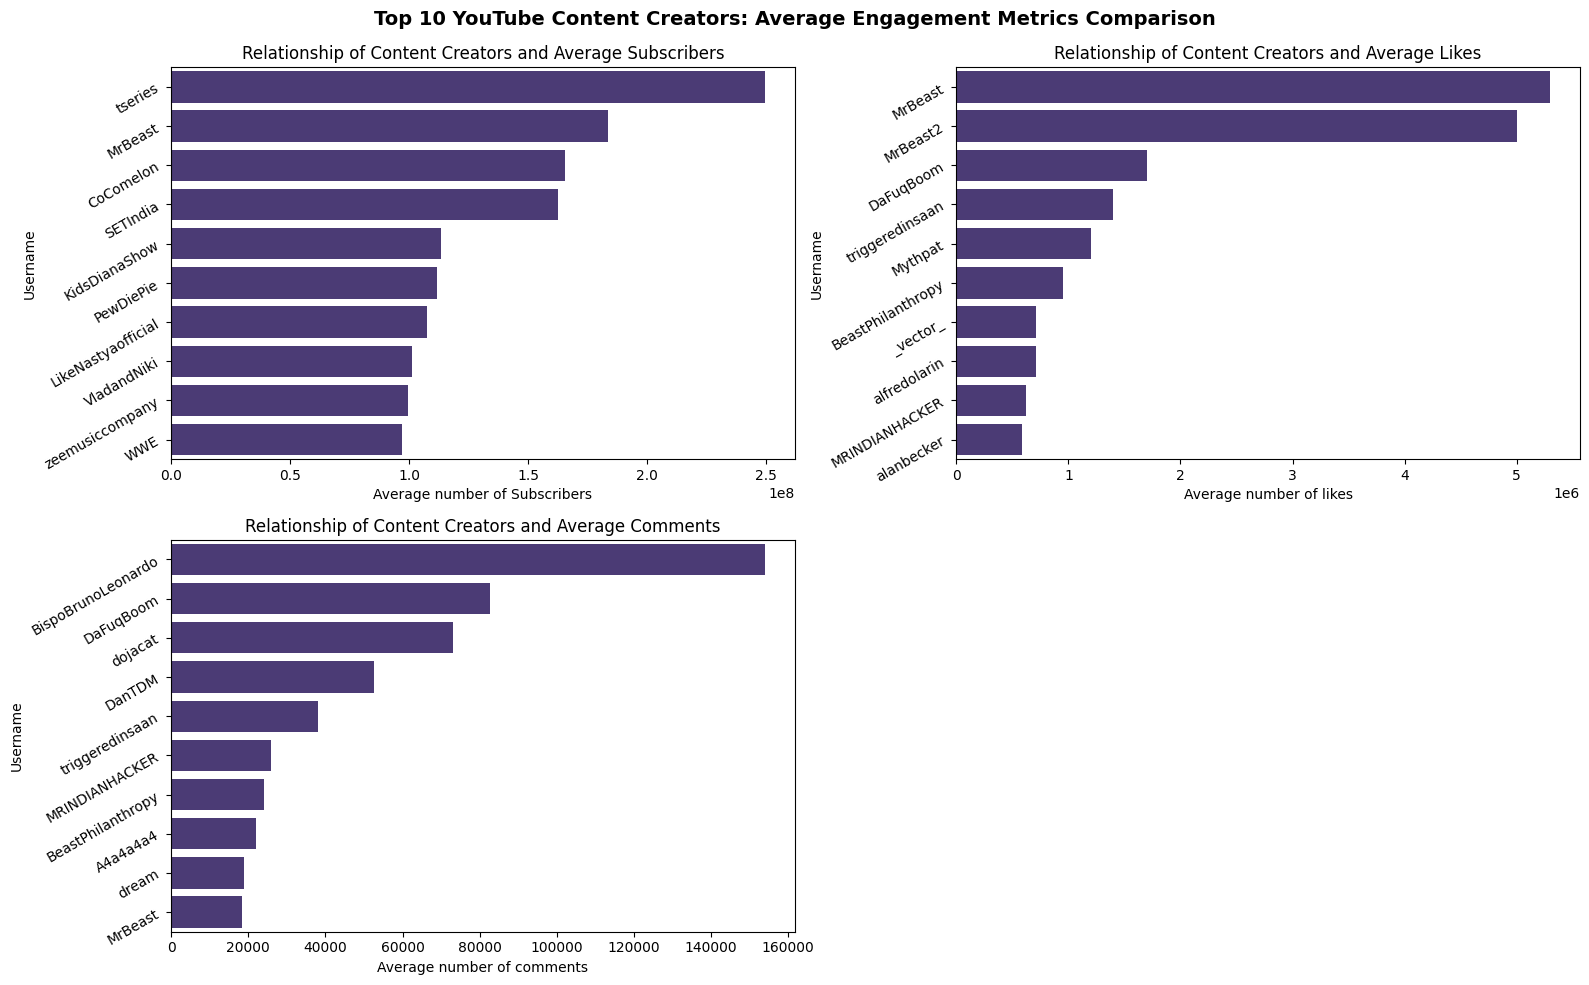

In [20]:
# Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.
# Who are the top-performing content creators?


# Top creators based on subscriptions
top_content_creators_s = data.groupby('Username')['Suscribers'].mean().reset_index().sort_values(by='Suscribers', ascending=False)
# Top ten Creators
top_ten_youtubers_by_subscriptions = top_content_creators_s.head(10)

# Top creators based on likes
top_content_creators_l = data.groupby('Username')['Likes'].mean().reset_index().sort_values(by='Likes', ascending=False)
# Top ten Creators
top_ten_youtubers_by_likes = top_content_creators_l.head(10)

# Top creators based on comments
top_content_creators_c = data.groupby('Username')['Comments'].mean().reset_index().sort_values(by='Comments', ascending=False)
# Top ten Creators
top_ten_youtubers_by_comments = top_content_creators_c.head(10)

# Visualization
# Create subplots with 3 columns
fig, axes =plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

# Define a custom color Palette
sns.set_palette('viridis')

# plot bar plot of Top YouTube subscribers 
sns.barplot(data = top_ten_youtubers_by_subscriptions, x='Suscribers', y='Username', ax=axes[0, 0])
axes[0, 0].set_title('Relationship of Content Creators and Average Subscribers')
axes[0, 0].set_xlabel('Average number of Subscribers')
axes[0, 0].set_ylabel('Username')
axes[0, 0].tick_params(axis='y', rotation=30)

# plot bar plot of Top likes
sns.barplot(data = top_ten_youtubers_by_likes, x='Likes', y='Username', ax=axes[0, 1])
axes[0, 1].set_title('Relationship of Content Creators and Average Likes')
axes[0, 1].set_xlabel('Average number of likes')
axes[0, 1].set_ylabel('Username')
axes[0, 1].tick_params(axis='y', rotation=30)

# plot bar plot of Top comments
sns.barplot(data = top_ten_youtubers_by_comments, x='Comments',  y='Username', ax=axes[1, 0])
axes[1, 0].set_title('Relationship of Content Creators and Average Comments')
axes[1, 0].set_xlabel('Average number of comments')
axes[1, 0].set_ylabel('Username')
axes[1, 0].tick_params(axis='y', rotation=30)

# Removal of empy subplot in second row and second column
fig.delaxes(axes[1, 1])

#Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96]) # rect parameter ensures the suptitle does not overlap with subplots

#Addition of common title for all subplots
fig.suptitle('Top 10 YouTube Content Creators: Average Engagement Metrics Comparison',fontsize=14, fontweight='bold')
#show the plot
plt.show()